In [2]:
import re
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from pywsd.utils import lemmatize_sentence

Warming up PyWSD (takes ~10 secs)... took 4.3644797801971436 secs.


In [3]:
data = pd.read_csv('data/ads_en_us.csv')

In [4]:
data.head()

,Unnamed: 0,catid,id,subcatid,value
0,0,2,45493,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
1,1,2,45499,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
2,2,2,45522,27,Overview:\r\n\r\nUnder general supervision by ...
3,3,2,45543,134,Be your own boss working under a Strong Brand ...
4,4,2,45545,134,Be your own boss working under a Strong Brand ...


In [4]:
Counter(data["catid"])

Counter({2: 95005, 3: 2596})

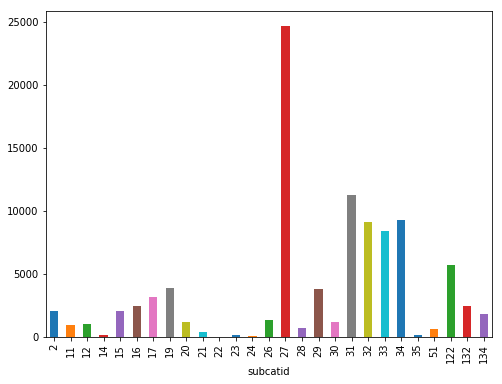

In [5]:
fig = plt.figure(figsize=(8,6))
data.groupby('subcatid').value.count().plot.bar(ylim=0)

## Remove Duplicates in value fields 

In [6]:
data = data.drop_duplicates(subset='value',keep='last')

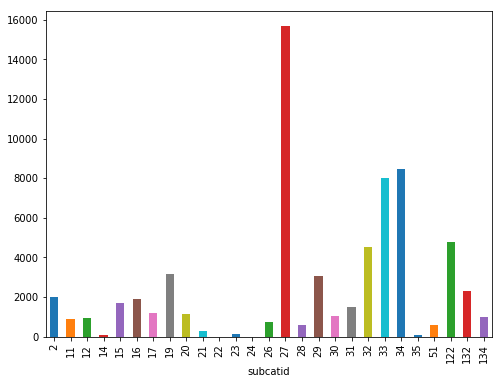

In [7]:
fig = plt.figure(figsize=(8,6))
data.groupby('subcatid').value.count().plot.bar(ylim=0)
plt.show()

In [8]:
def clean_str(s):
    """Clean sentence"""
    s = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", s)
    s = re.sub(r"\'s", " \'s", s)
    s = re.sub(r"\'ve", " \'ve", s)
    s = re.sub(r"n\'t", " n\'t", s)
    s = re.sub(r"\'re", " \'re", s)
    s = re.sub(r"\'d", " \'d", s)
    s = re.sub(r"\'ll", " \'ll", s)
    s = re.sub(r",", " , ", s)
    s = re.sub(r"!", " ! ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", s)
    s = re.sub(r'[^\x00-\x7F]+', "", s)
    return s.strip().lower()

In [9]:
data['value_processed'] = data.value.apply(clean_str)

## Keeping Data that has count > 100

In [10]:
data_bal=data.groupby('subcatid').filter(lambda x: len(x) >= 100)

In [11]:
data_bal.value_processed.head()

1      overview why affirma rehabilitation \? our inn...
2      overview under general supervision by the supe...
15     a california group is currently seeking a locu...
57     job description job description i am pleased t...
101    assesses , plans , implements , coordinates , ...
Name: value_processed, dtype: object

In [36]:
sub_cat = []
sub_cat = [w for w in data_bal.subcatid.unique()]
print(sub_cat)

[27, 21, 134, 16, 34, 122, 32, 33, 11, 132, 29, 30, 15, 31, 12, 19, 17, 28, 26, 20, 23, 2, 51]


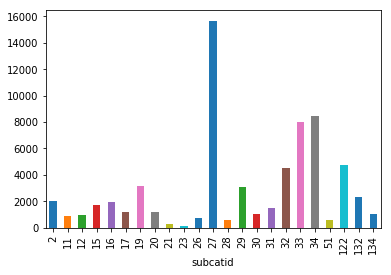

In [12]:
data_bal.groupby('subcatid').value.count().plot.bar(ylim=0)
plt.show()

## Remove Stop words 

In [13]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [14]:
def remove_stop_words(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    sentence = ' '.join(filtered_sentence)
    return sentence

In [22]:
def perform_stemming(sentence):
    word_tokens = word_tokenize(sentence)
    stemmed_sentence = [ps.stem(w) for w in word_tokens]
    return ' '.join(stemmed_sentence)
    

In [23]:
def perform_lemm(sentence):
    word_tokens = word_tokenize(sentence)
    lemm_sentence = [lemmatizer.lemmatize(w,pos='v') for w in word_tokens]
    return ' '.join(lemm_sentence)

In [17]:
data_bal['value_processed'] = data_bal.value_processed.apply(remove_stop_words)

/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
data_bal['value_processed_stem'] = data_bal.value_processed.apply(perform_stemming)

/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
data_bal['value_processed_lemm'] = data_bal.value_processed.apply(perform_lemm)

/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_bal.value_processed.head(10)

1      overview affirma rehabilitation \ ? innovative...
2      overview general supervision supervisor , nurs...
15     california group currently seeking locum tenen...
57     job description job description pleased call a...
101    assesses , plans , implements , coordinates , ...
104    assists pharmacist preparation , dispensing , ...
106    procurement contracts manager opportunity mark...
107    director , technical accounting revenue recogn...
113    software engineering lead architect software e...
118    boss working strong brand track record success...
Name: value_processed, dtype: object

In [25]:
data_bal.value_processed_lemm.head(10)

1      overview affirma rehabilitation \ ? innovative...
2      overview general supervision supervisor , nurs...
15     california group currently seek locum tenens f...
57     job description job description please call at...
101    assess , plan , implement , coordinate , monit...
104    assist pharmacist preparation , dispense , dis...
106    procurement contract manager opportunity marke...
107    director , technical account revenue recogniti...
113    software engineer lead architect software engi...
118    boss work strong brand track record success ca...
Name: value_processed_lemm, dtype: object

In [25]:
data_bal.value_processed_stem.head(10)

1      [overview, affirma, rehabilit, \, ?, innov, ph...
2      [overview, gener, supervis, supervisor, ,, nur...
15     [california, group, current, seek, locum, tene...
57     [job, descript, job, descript, pleas, call, at...
101    [assess, ,, plan, ,, implement, ,, coordin, ,,...
104    [assist, pharmacist, prepar, ,, dispens, ,, di...
106    [procur, contract, manag, opportun, marketo, a...
107    [director, ,, technic, account, revenu, recogn...
113    [softwar, engin, lead, architect, softwar, eng...
118    [boss, work, strong, brand, track, record, suc...
Name: value_processed_stem, dtype: object

# Starting to Perform ML functions 

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [42]:
X = data_bal.value_processed_lemm
y = data_bal.subcatid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

## Using NB

In [43]:

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=sub_cat))

accuracy 0.5633602519173142


## Using OVR With Linear SVC

In [51]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [54]:
#fit model with training data
model.fit(X_train, y_train)

/home/sorta/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ..._class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=None))])

In [56]:
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8173599471786277
